# Study the decision tree algorithm, focusing on both entropy based information gain and Gini index for splitting. Build decision trees and random forests for the loan datasets. As always, prepare three slides detailing problem description, data, technical approach, and results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
loan_df = pd.read_excel('loan.xlsx')

In [2]:
loan_df.info() ##this gives summery of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              429 non-null    object 
 1   Age              429 non-null    float64
 2   Time_at_address  429 non-null    float64
 3   Res_status       429 non-null    object 
 4   Telephone        429 non-null    object 
 5   Occupation       429 non-null    object 
 6   Job_status       429 non-null    object 
 7   Time_employed    429 non-null    int64  
 8   Time_bank        429 non-null    int64  
 9   Liab_ref         429 non-null    object 
 10  Acc_ref          429 non-null    object 
 11  Home_Expn        429 non-null    int64  
 12  Balance          429 non-null    int64  
 13  Decision         429 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 47.0+ KB


In [3]:
loan_df.columns

Index(['Sex', 'Age', 'Time_at_address', 'Res_status', 'Telephone',
       'Occupation', 'Job_status', 'Time_employed', 'Time_bank', 'Liab_ref',
       'Acc_ref', 'Home_Expn', 'Balance', 'Decision'],
      dtype='object')

In [4]:
#  loan dataset has categorical columns so performing chi square test to check the relation among the columns

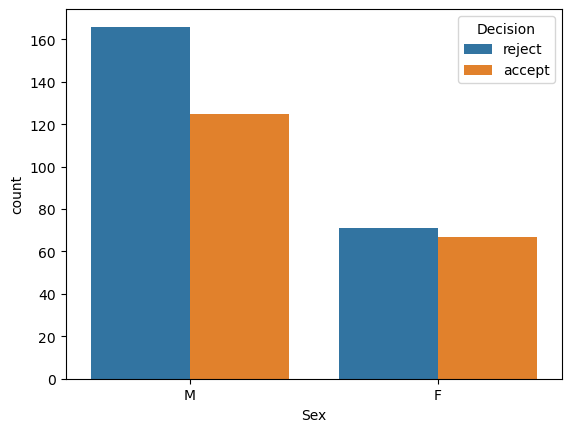

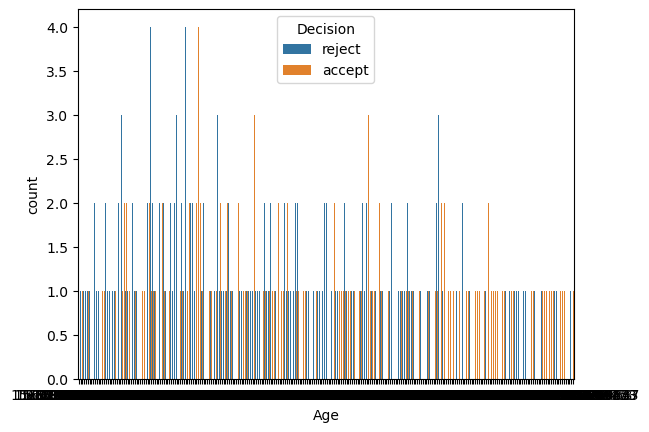

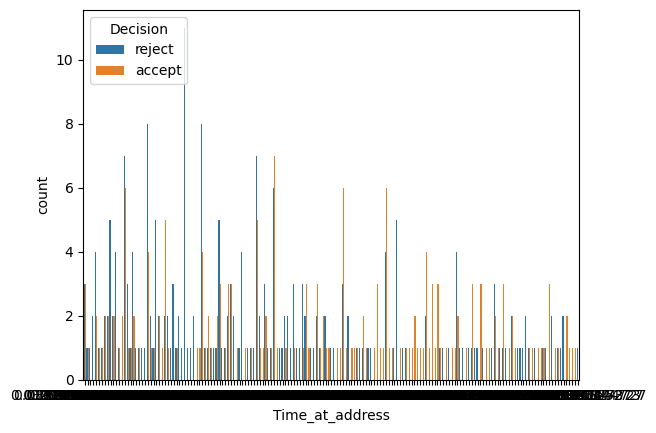

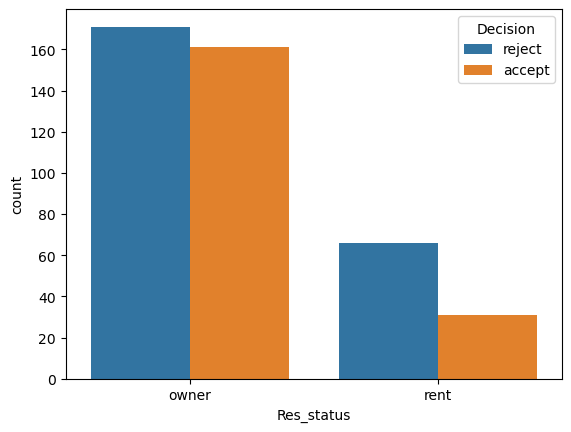

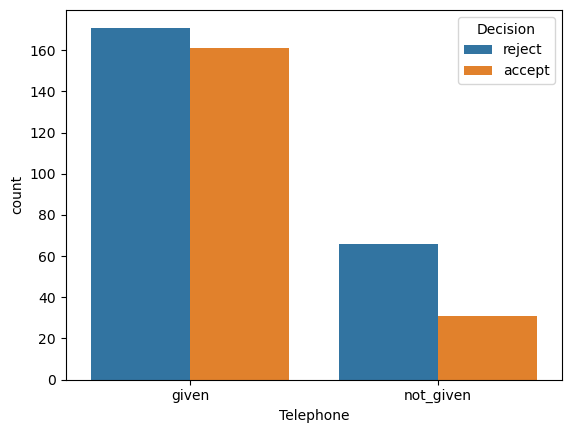

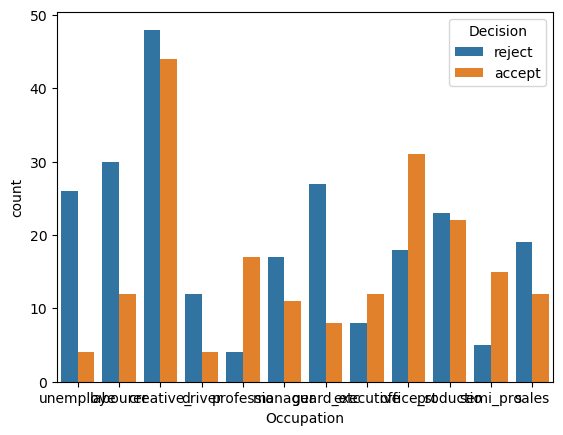

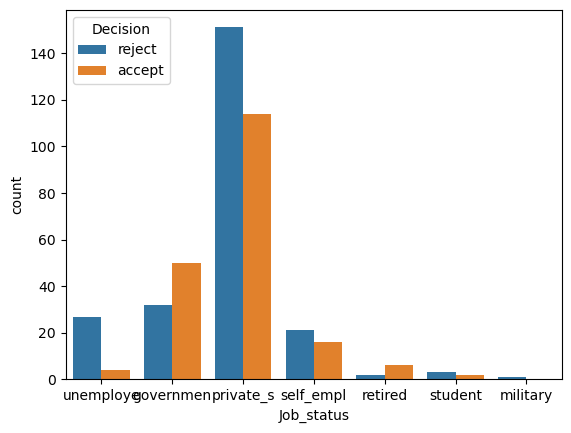

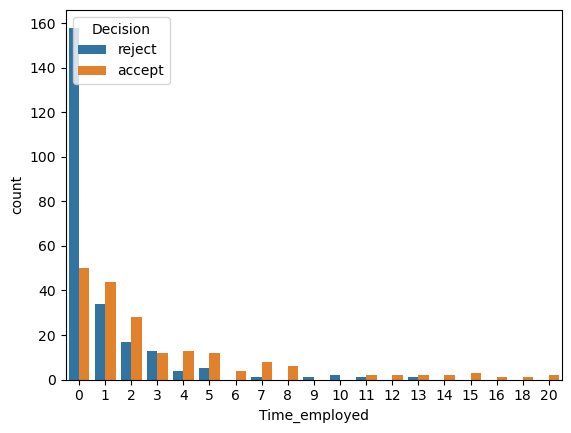

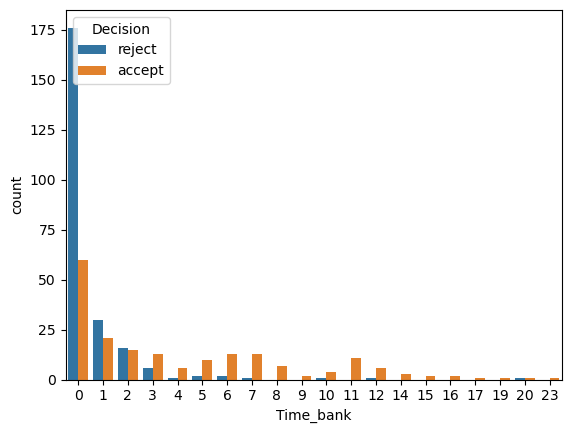

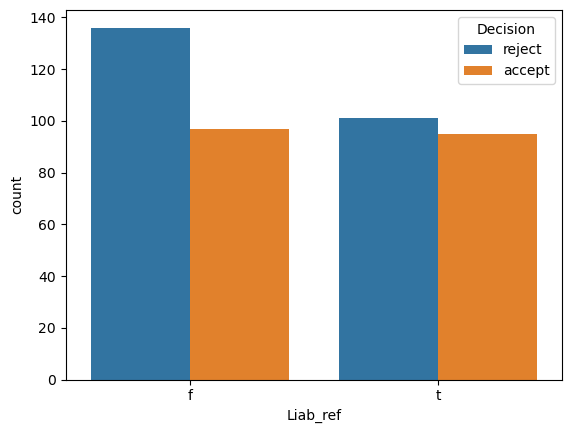

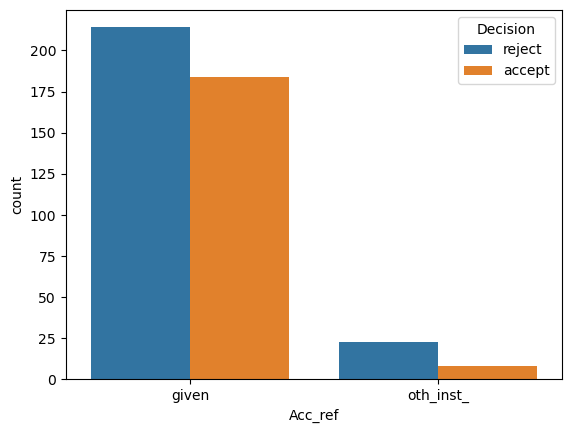

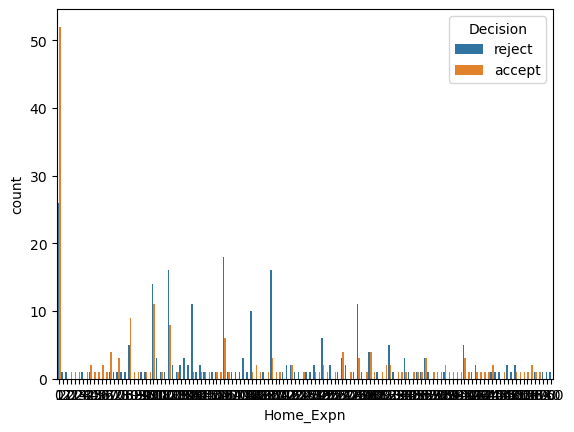

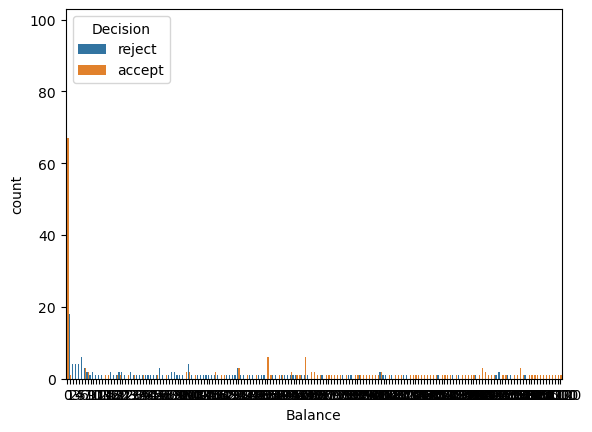

In [5]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

# read in xlsx file
df = pd.read_excel("loan.xlsx")

# list of column names
cols = ["Sex", "Age", "Time_at_address", "Res_status", "Telephone", "Occupation", "Job_status", "Time_employed", "Time_bank" ,"Liab_ref", "Acc_ref", "Home_Expn" ,"Balance"]

# loop through each column and plot countplot of the decisions
for col in cols:
    sns.countplot(x=col, hue="Decision", data=df)
    plt.show()


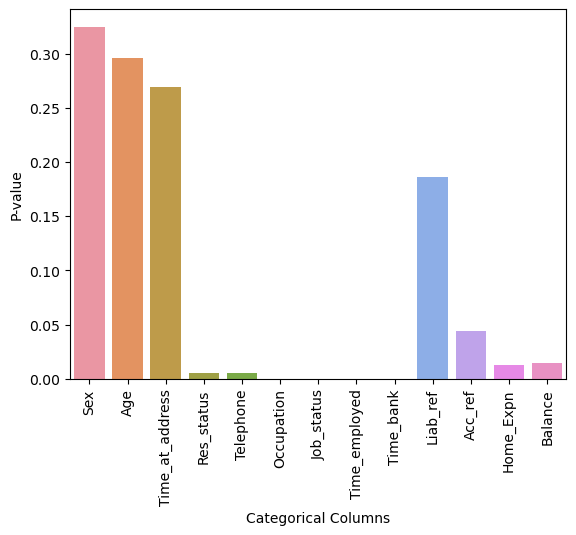

In [6]:
# list to store p-values
p_values = []
# loop through each column and calculate chi-square test of independence
for col in cols:
    cont_table = pd.crosstab(df[col], df["Decision"])
    chi2, p, dof, expected = chi2_contingency(cont_table)
    p_values.append(p)

# create a bar plot of the p-values
sns.barplot(x=cols, y=p_values)
plt.xticks(rotation=90)
plt.xlabel("Categorical Columns")
plt.ylabel("P-value")
plt.show()

Performing one hot encoding for the categorical columns to get respective continuous values as scikit learn's DecisionTree model doesn't permit categorical values

In [7]:
# perform one-hot encoding for each column in cols
df = pd.get_dummies(df, columns=cols, prefix=cols, prefix_sep="_", drop_first=True)

In [8]:
df.info

<bound method DataFrame.info of     Decision  Sex_M  Age_15.75  Age_15.8299999237061  Age_15.9200000762939  \
0     reject      1          0                     0                     0   
1     reject      1          0                     0                     0   
2     accept      0          0                     0                     0   
3     accept      1          0                     0                     0   
4     reject      1          0                     0                     0   
..       ...    ...        ...                   ...                   ...   
424   reject      1          0                     0                     0   
425   reject      0          0                     0                     0   
426   accept      1          0                     0                     0   
427   accept      1          0                     0                     0   
428   reject      1          0                     0                     0   

     Age_16.0  Age_16.079999923

In [9]:
# Prepare training and testing data
from sklearn.model_selection import train_test_split
# define X (features) and y (target)
X = df.drop("Decision", axis=1)
y = df["Decision"]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entropy is a measure of the impurity or disorder of a set of data. In decision trees, entropy is used to quantify the uncertainty or randomness of the target variable within a set of data. The goal of the algorithm is to split the data into subsets such that the entropy (or disorder) of the target variable within each subset is as low as possible.

Information gain is a measure of the reduction in entropy achieved by splitting the data into subsets. In decision trees, information gain is used to determine which feature to split the data on at each node of the tree. The feature with the highest information gain is chosen to split the data, because this results in the greatest reduction in entropy and results in the most pure subsets with respect to the target variable.

In [10]:
from sklearn.tree import DecisionTreeClassifier
loan_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
loan_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
LoanPredictions = loan_tree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, LoanPredictions, target_names=['accept', 'reject']))

              precision    recall  f1-score   support

      accept       0.68      0.53      0.60        43
      reject       0.62      0.74      0.67        43

    accuracy                           0.64        86
   macro avg       0.65      0.64      0.64        86
weighted avg       0.65      0.64      0.64        86



 accuracy 65% for now we plot the decision tree later we will perform pruning to improve accuracy

[Text(0.9, 0.9891304347826086, 'Occupation_professio <= 0.5\nentropy = 0.988\nsamples = 343\nvalue = [149, 194]\nclass = Approve'),
 Text(0.8489795918367347, 0.967391304347826, 'Time_bank_11 <= 0.5\nentropy = 0.977\nsamples = 324\nvalue = [133, 191]\nclass = Approve'),
 Text(0.8326530612244898, 0.9456521739130435, 'Time_bank_7 <= 0.5\nentropy = 0.969\nsamples = 317\nvalue = [126, 191]\nclass = Approve'),
 Text(0.7795918367346939, 0.9239130434782609, 'Job_status_unemploye <= 0.5\nentropy = 0.959\nsamples = 307\nvalue = [117, 190]\nclass = Approve'),
 Text(0.7224489795918367, 0.9021739130434783, 'Home_Expn_140 <= 0.5\nentropy = 0.974\nsamples = 281\nvalue = [114, 167]\nclass = Approve'),
 Text(0.7061224489795919, 0.8804347826086957, 'Time_bank_6 <= 0.5\nentropy = 0.982\nsamples = 271\nvalue = [114, 157]\nclass = Approve'),
 Text(0.673469387755102, 0.8586956521739131, 'Balance_300 <= 0.5\nentropy = 0.974\nsamples = 262\nvalue = [106, 156]\nclass = Approve'),
 Text(0.6571428571428571, 0.83

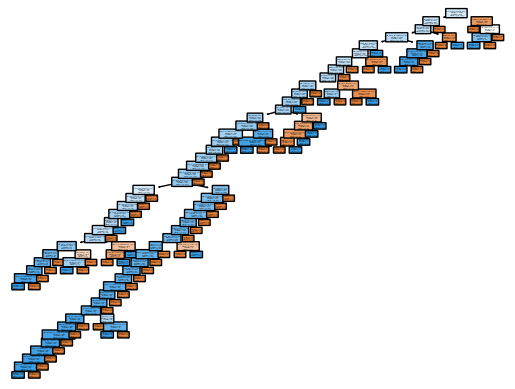

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Train the decision tree model
loan_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
loan_tree.fit(X_train, y_train)

# Plot the decision tree
plot_tree(loan_tree, filled=True, rounded=True, class_names=["Decline", "Approve"], feature_names=X_train.columns)


In [14]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [29]:
import graphviz
from sklearn import tree
features = list(X.columns)
classes = ['accept', 'reject']
asgTreeClfData = tree.export_graphviz(loan_tree, out_file=None, 
                      feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                      special_characters=True)  
asgLoanGraph = graphviz.Source(asgTreeClfData)  
asgLoanGraph 
asgLoanGraph.render(filename='graph.png')

'graph.png.pdf'

In [16]:
loan_tree.tree_.max_depth

45

As we can see the distance from the top node to the leaf node of the tree is very long, the depth of tree is 45 which is not the best split. So now we will perform pruning to select a tree on the criterion = 'entropy' having the maximum Information Gain

In [17]:
path = loan_tree.cost_complexity_pruning_path(X_train, y_train)
loan_tree_ccp_alphas = path.ccp_alphas
loan_tree_impurities = path.impurities
loan_clfs = []
for loan_tree_ccp_alpha in loan_tree_ccp_alphas:
    loan_clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha=loan_tree_ccp_alpha, random_state=0)
    loan_clf.fit(X_train, y_train)
    loan_clfs.append(loan_clf)

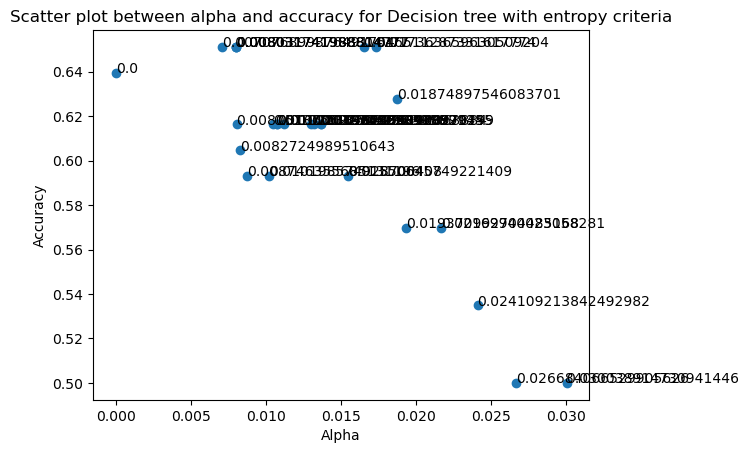

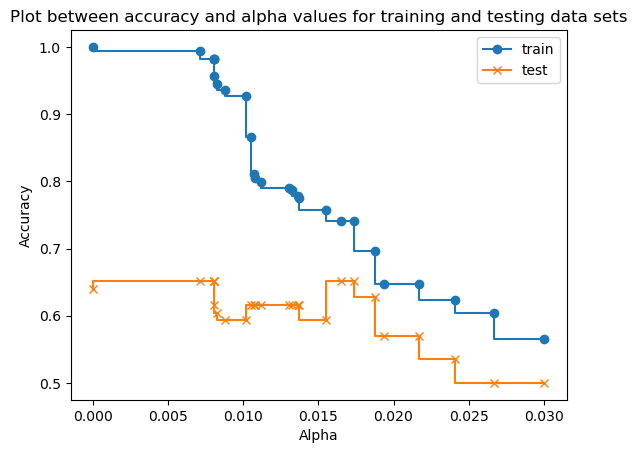

In [18]:
train_scores = [loan_clf.score(X_train, y_train) for loan_clf in loan_clfs]
test_scores = [loan_clf.score(X_test, y_test) for loan_clf in loan_clfs]



plt.scatter(x=loan_tree_ccp_alphas, y=test_scores)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Scatter plot between alpha and accuracy for Decision tree with entropy criteria')

for i in range(len(test_scores)):
    plt.annotate(loan_tree_ccp_alphas[i], (loan_tree_ccp_alphas[i], test_scores[i]))
    
fig, axes = plt.subplots()
axes.set_xlabel('Alpha')
axes.set_ylabel('Accuracy')
axes.set_title('Plot between accuracy and alpha values for training and testing data sets')
axes.plot(loan_tree_ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-pre')
axes.plot(loan_tree_ccp_alphas, test_scores, marker='x', label='test', drawstyle='steps-pre' )
axes.legend()
plt.show()

As we can see from the above plot that increase in alpha decreases the accuracy. Cost Complexity Pruning provides option to control the size of the tree. Greater ccp_alpha values increases the number of nodes pruned and its not necessarily true that it will increase accuracy, as we can infer from the above plot

I have selected ccp_alpha as 0.05568812 where the accuracy is close to 75%, and lets plot the tree and see whether we get minimized tree or not.

In [59]:
# asg_loan_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', ccp_alpha=0.055688115042206165)
loan_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', ccp_alpha=0.008)

loan_tree_clf.fit(X_train, y_train)
loan_tree_pred = loan_tree_clf.predict(X_test)

print('score', loan_tree_clf.score(X_test, y_test))

from sklearn.metrics import accuracy_score

print(accuracy_score(loan_tree_pred, y_test))

print(classification_report(y_test, loan_tree_pred, target_names=['accept', 'reject']))

score 0.6511627906976745
0.6511627906976745
              precision    recall  f1-score   support

      accept       0.69      0.56      0.62        43
      reject       0.63      0.74      0.68        43

    accuracy                           0.65        86
   macro avg       0.66      0.65      0.65        86
weighted avg       0.66      0.65      0.65        86



In [62]:
loan_tree.tree_.max_depth

45

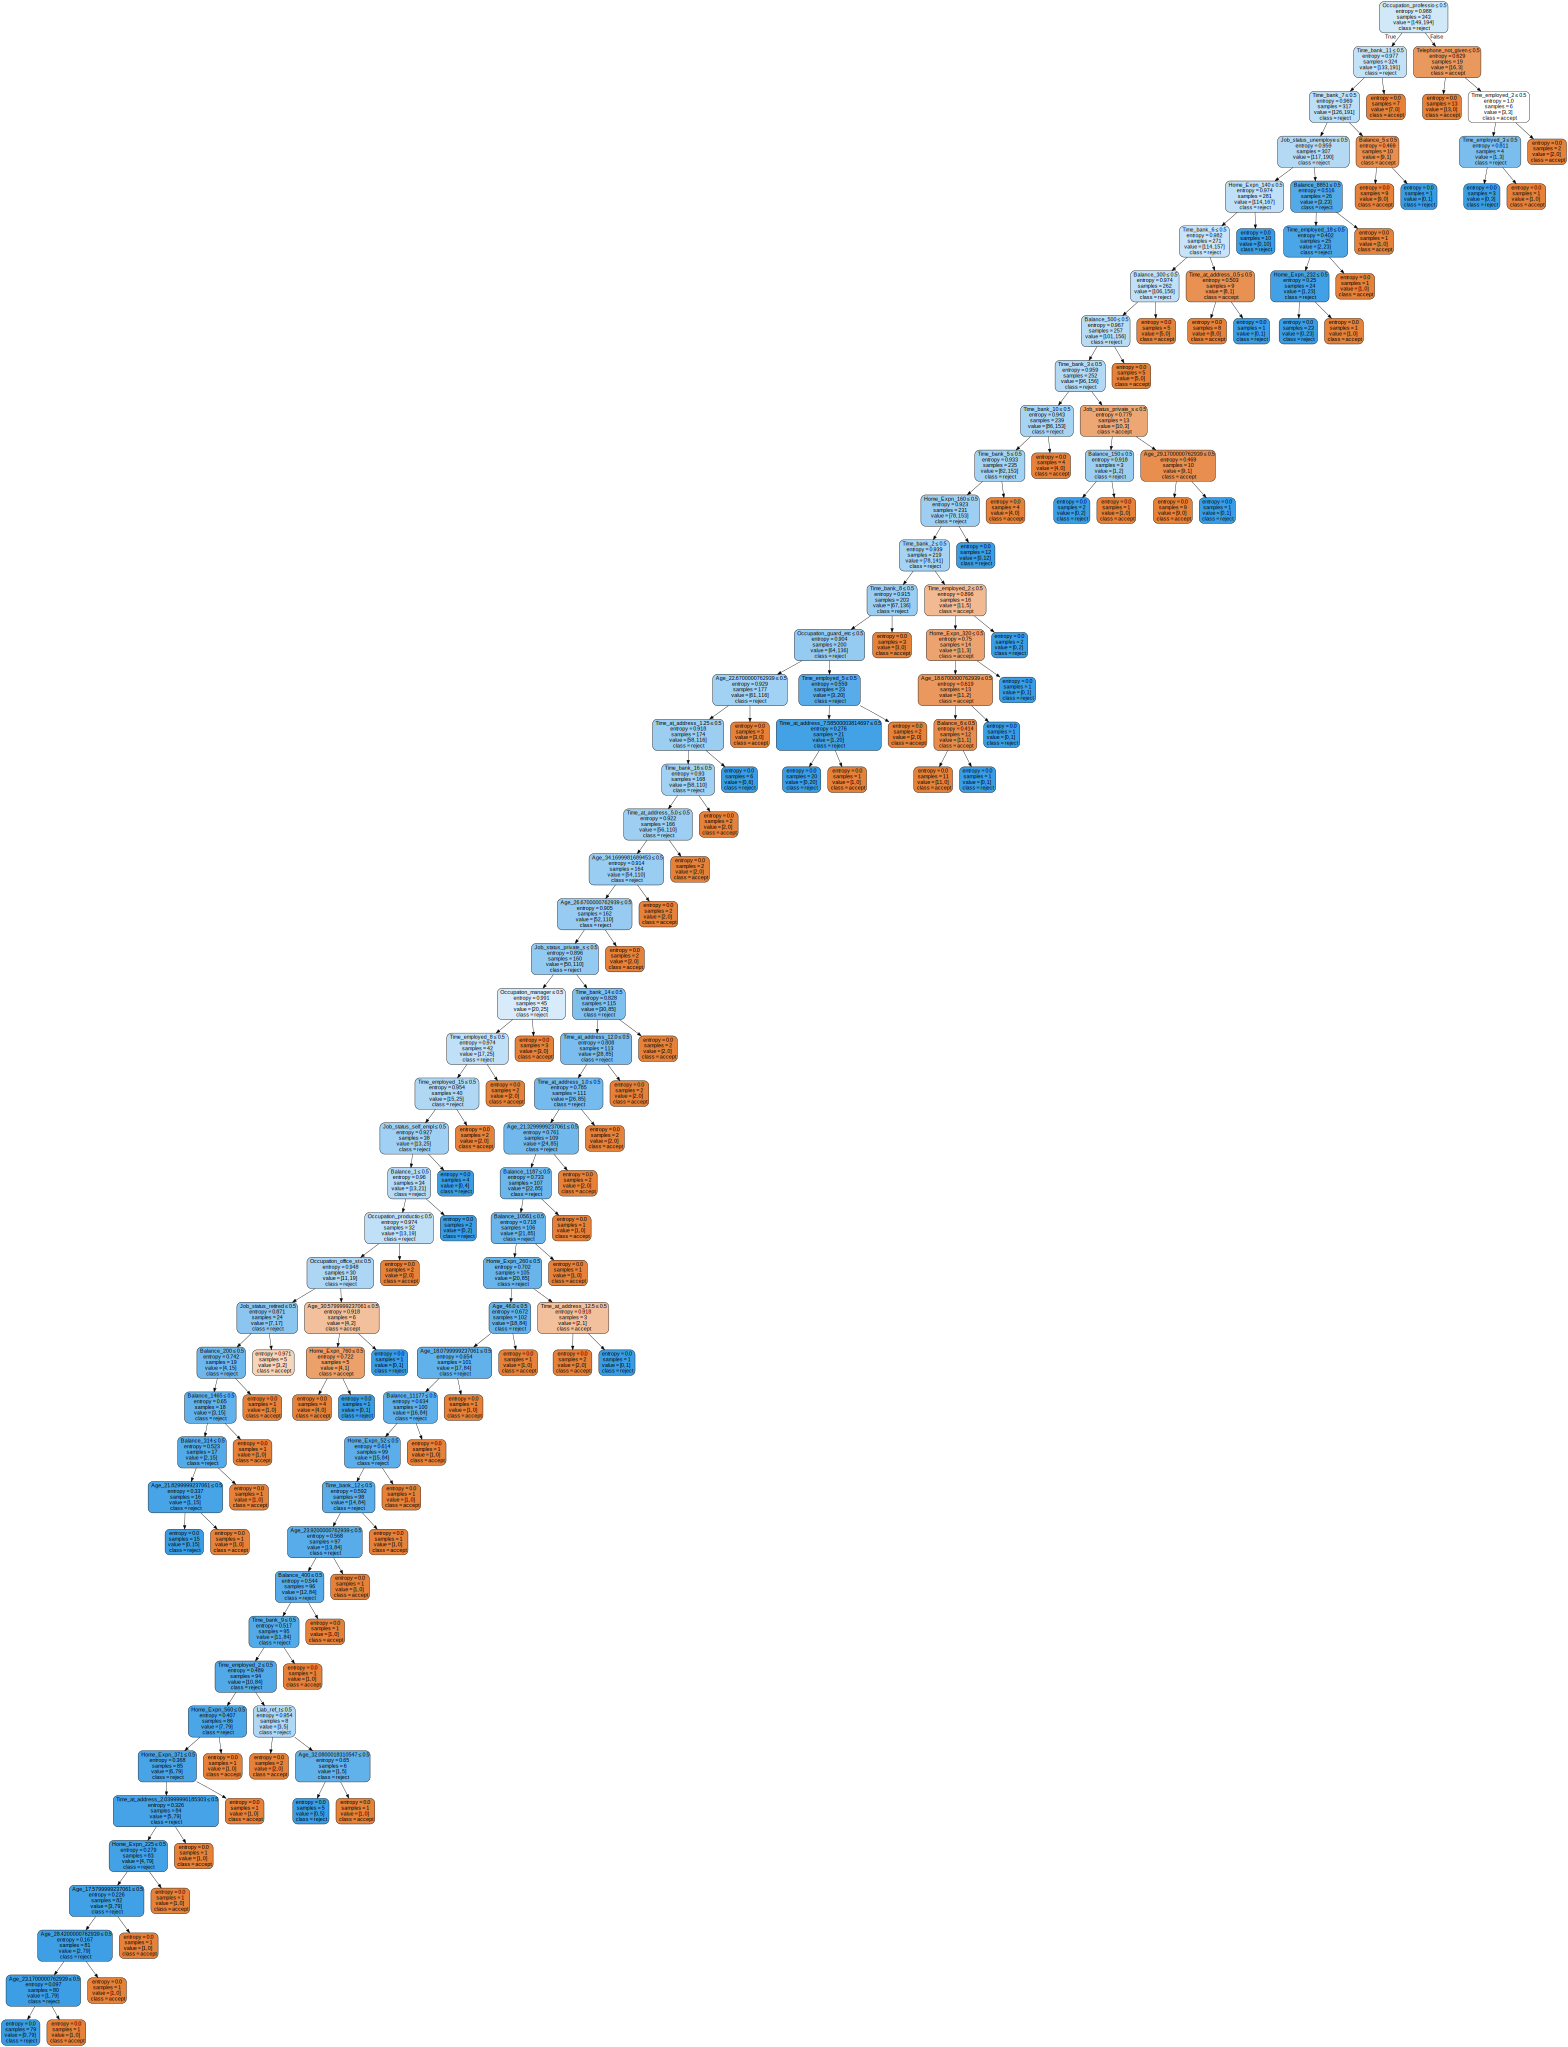

In [60]:
from sklearn import tree
import graphviz
features = list(X.columns)
classes = ['accept', 'reject']
asgTreeClfData = tree.export_graphviz(loan_tree_clf, out_file=None, 
                      feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                      special_characters=True)  
asgLoanGraph = graphviz.Source(asgTreeClfData)  
asgLoanGraph 

[Text(0.5, 1.0, 'Feature importance in the decision tree with entropy criterion')]

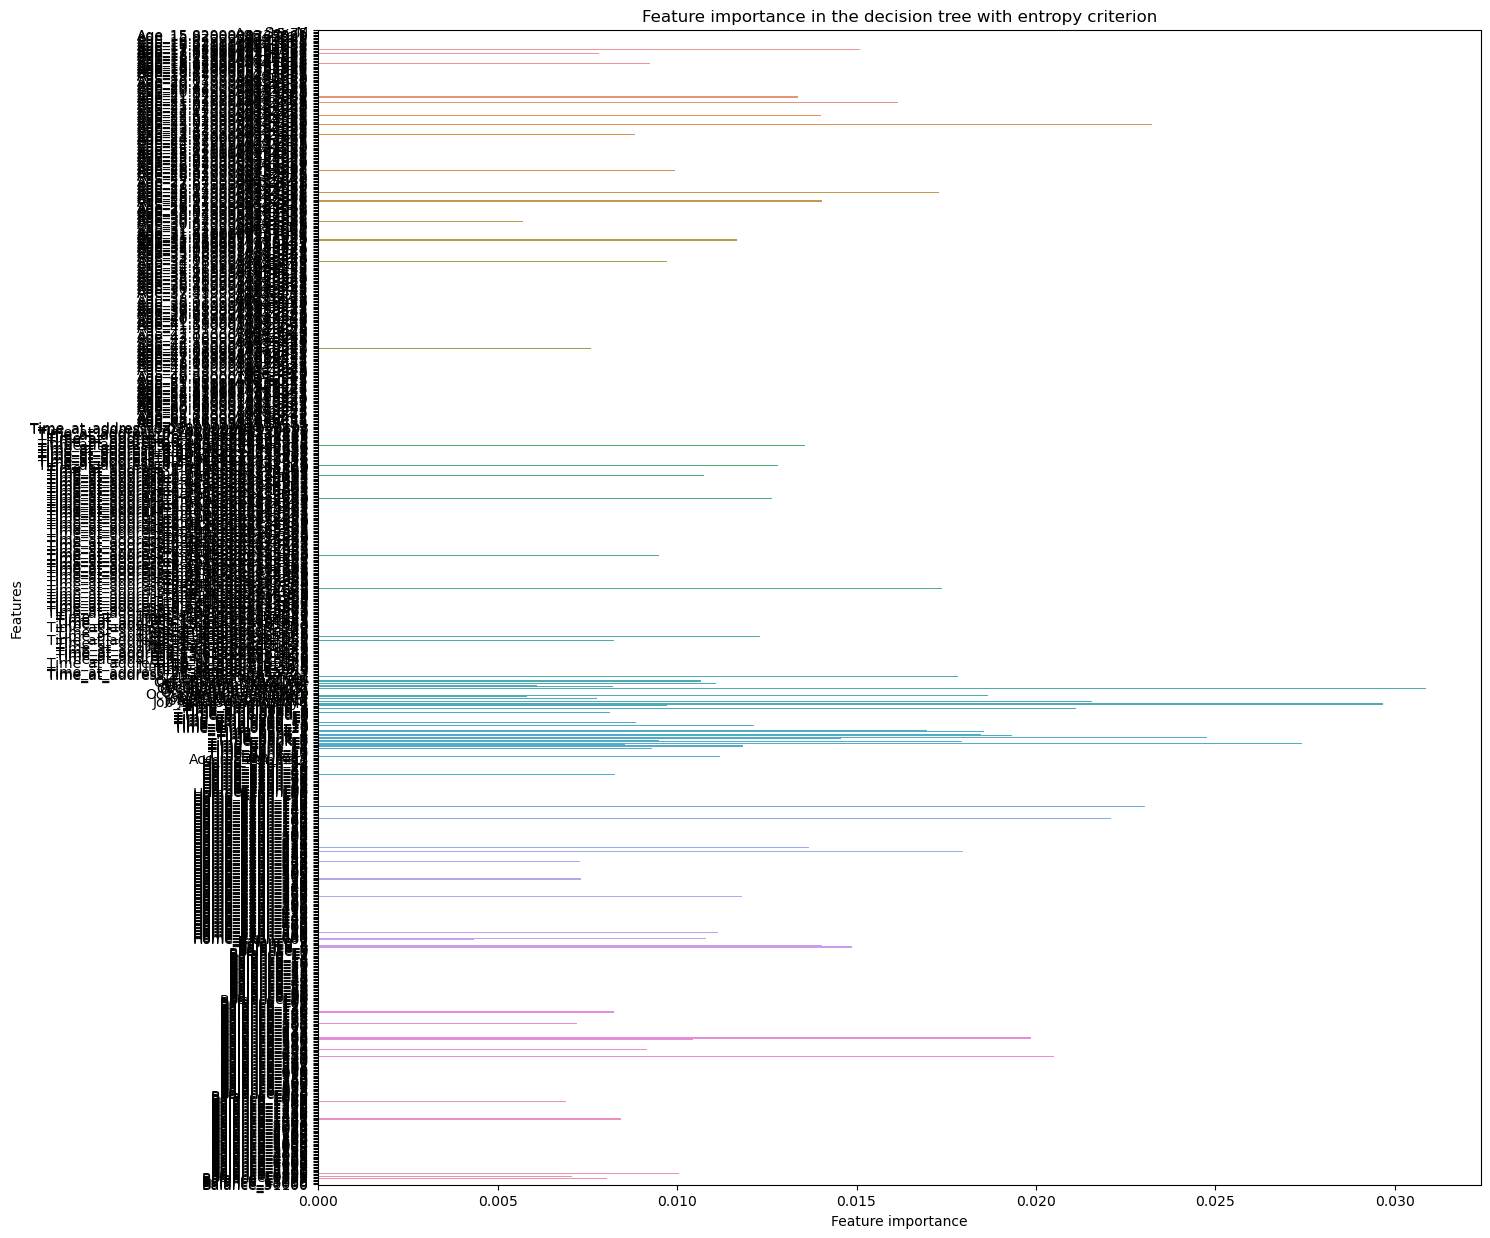

In [61]:
loan_tree_features_dict = {'Feature importance': loan_tree_clf.feature_importances_,
                             'Features': list(X.columns)}
loan_tree_features_df = pd.DataFrame(loan_tree_features_dict)

plt.figure(figsize=(15,15))
sns.barplot(data=loan_tree_features_df, y='Features', x='Feature importance').set(
    title='Feature importance in the decision tree with entropy criterion')

In [35]:
# lets use Gini criterion for the split.

In [36]:
loan_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=0)

loan_tree_gini.fit(X_train, y_train)
loan_gini_predictions = loan_tree_gini.predict(X_test)

print(classification_report(y_test, loan_gini_predictions, target_names=['accept', 'reject']))

              precision    recall  f1-score   support

      accept       0.64      0.63      0.64        43
      reject       0.64      0.65      0.64        43

    accuracy                           0.64        86
   macro avg       0.64      0.64      0.64        86
weighted avg       0.64      0.64      0.64        86



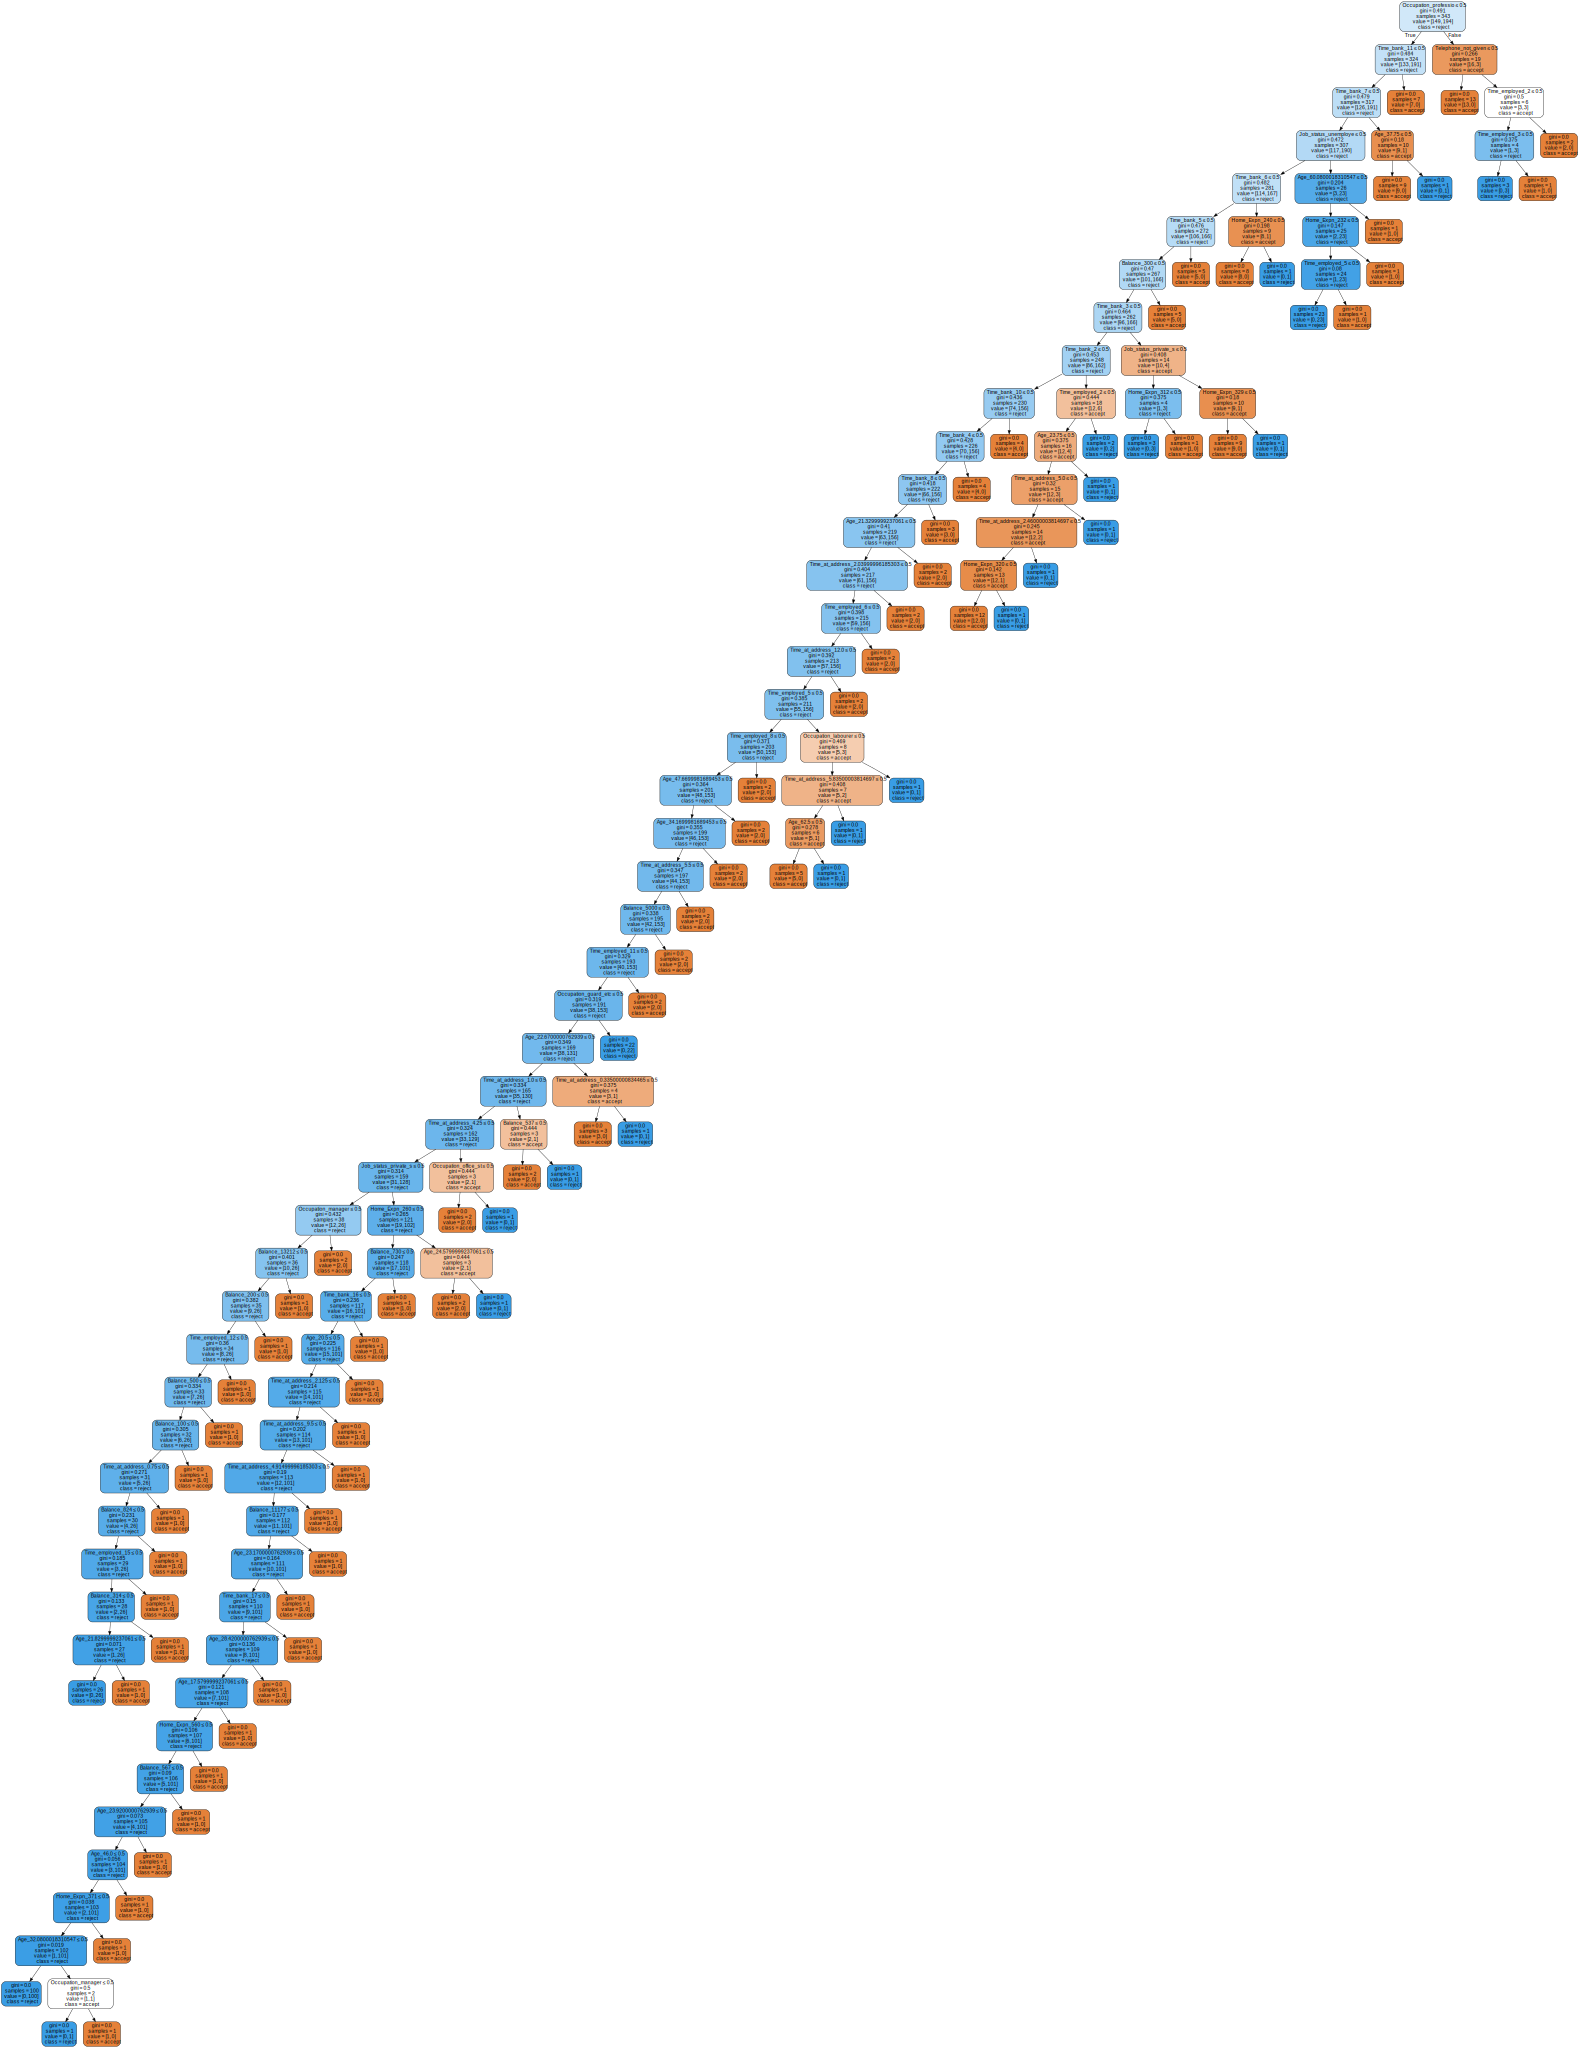

In [37]:
loan_gini_data = tree.export_graphviz(loan_tree_gini, out_file=None, 
                      feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                      special_characters=True)  
loan_gini_graph = graphviz.Source(loan_gini_data)  
loan_gini_graph 

In [38]:
# use Cost complexity pruning to prune the tree

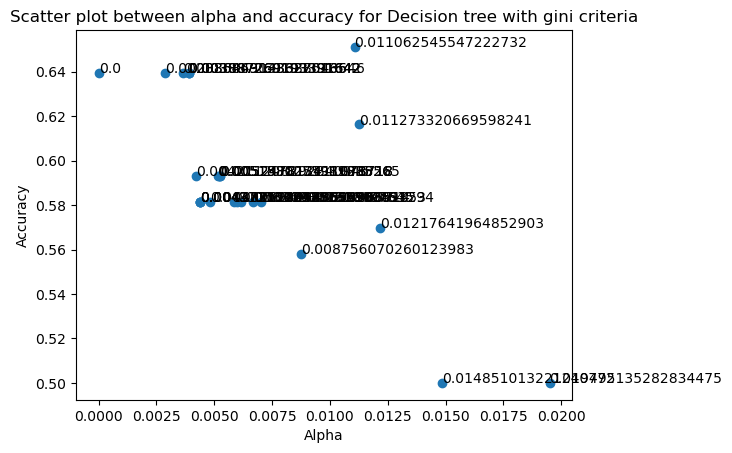

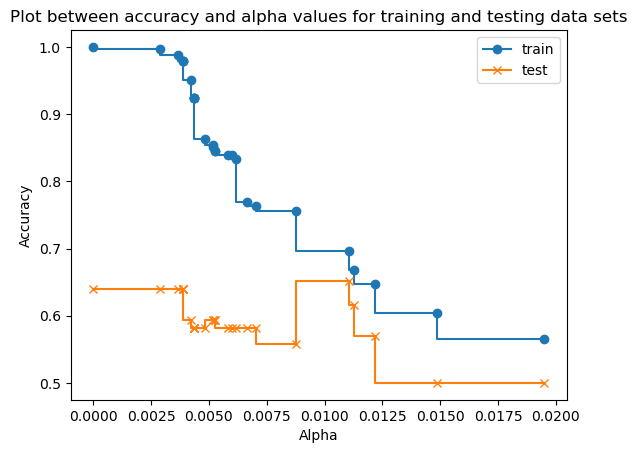

In [39]:
gini_path = loan_tree_gini.cost_complexity_pruning_path(X_train, y_train)
loan_gini_ccp_alphas = gini_path.ccp_alphas
loan_gini_impurities = gini_path.impurities

loan_gini_clfs = []
for loan_gini_ccp_alpha in loan_gini_ccp_alphas:
    loan_gini_clf = DecisionTreeClassifier(criterion='gini', ccp_alpha=loan_gini_ccp_alpha, random_state=0)
    loan_gini_clf.fit(X_train, y_train)
    loan_gini_clfs.append(loan_gini_clf)
    
    
train_scores_gini = [loan_gini_clf.score(X_train, y_train) for loan_gini_clf in loan_gini_clfs]
test_scores_gini = [loan_gini_clf.score(X_test, y_test) for loan_gini_clf in loan_gini_clfs]

# print(loan_tree_ccp_alphas)
# print(test_scores)

plt.scatter(x=loan_gini_ccp_alphas, y=test_scores_gini)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Scatter plot between alpha and accuracy for Decision tree with gini criteria')

for i in range(len(test_scores_gini)):
    plt.annotate(loan_gini_ccp_alphas[i], (loan_gini_ccp_alphas[i], test_scores_gini[i]))
    

fig, axes = plt.subplots()
axes.set_xlabel('Alpha')
axes.set_ylabel('Accuracy')
axes.set_title('Plot between accuracy and alpha values for training and testing data sets')
axes.plot(loan_gini_ccp_alphas, train_scores_gini, marker='o', label='train', drawstyle='steps-pre')
axes.plot(loan_gini_ccp_alphas, test_scores_gini, marker='x', label='test', drawstyle='steps-pre' )
axes.legend()
plt.show()

In [43]:
loan_gini_clf = DecisionTreeClassifier(random_state=0, criterion='gini', ccp_alpha=0.0087)

loan_gini_clf.fit(X_train, y_train)
loan_gini_pred = loan_gini_clf.predict(X_test)

print('score', loan_gini_clf.score(X_test, y_test))

from sklearn.metrics import accuracy_score

print(classification_report(y_test, loan_gini_pred, target_names=['accept', 'reject']))

score 0.5813953488372093
              precision    recall  f1-score   support

      accept       0.61      0.44      0.51        43
      reject       0.56      0.72      0.63        43

    accuracy                           0.58        86
   macro avg       0.59      0.58      0.57        86
weighted avg       0.59      0.58      0.57        86



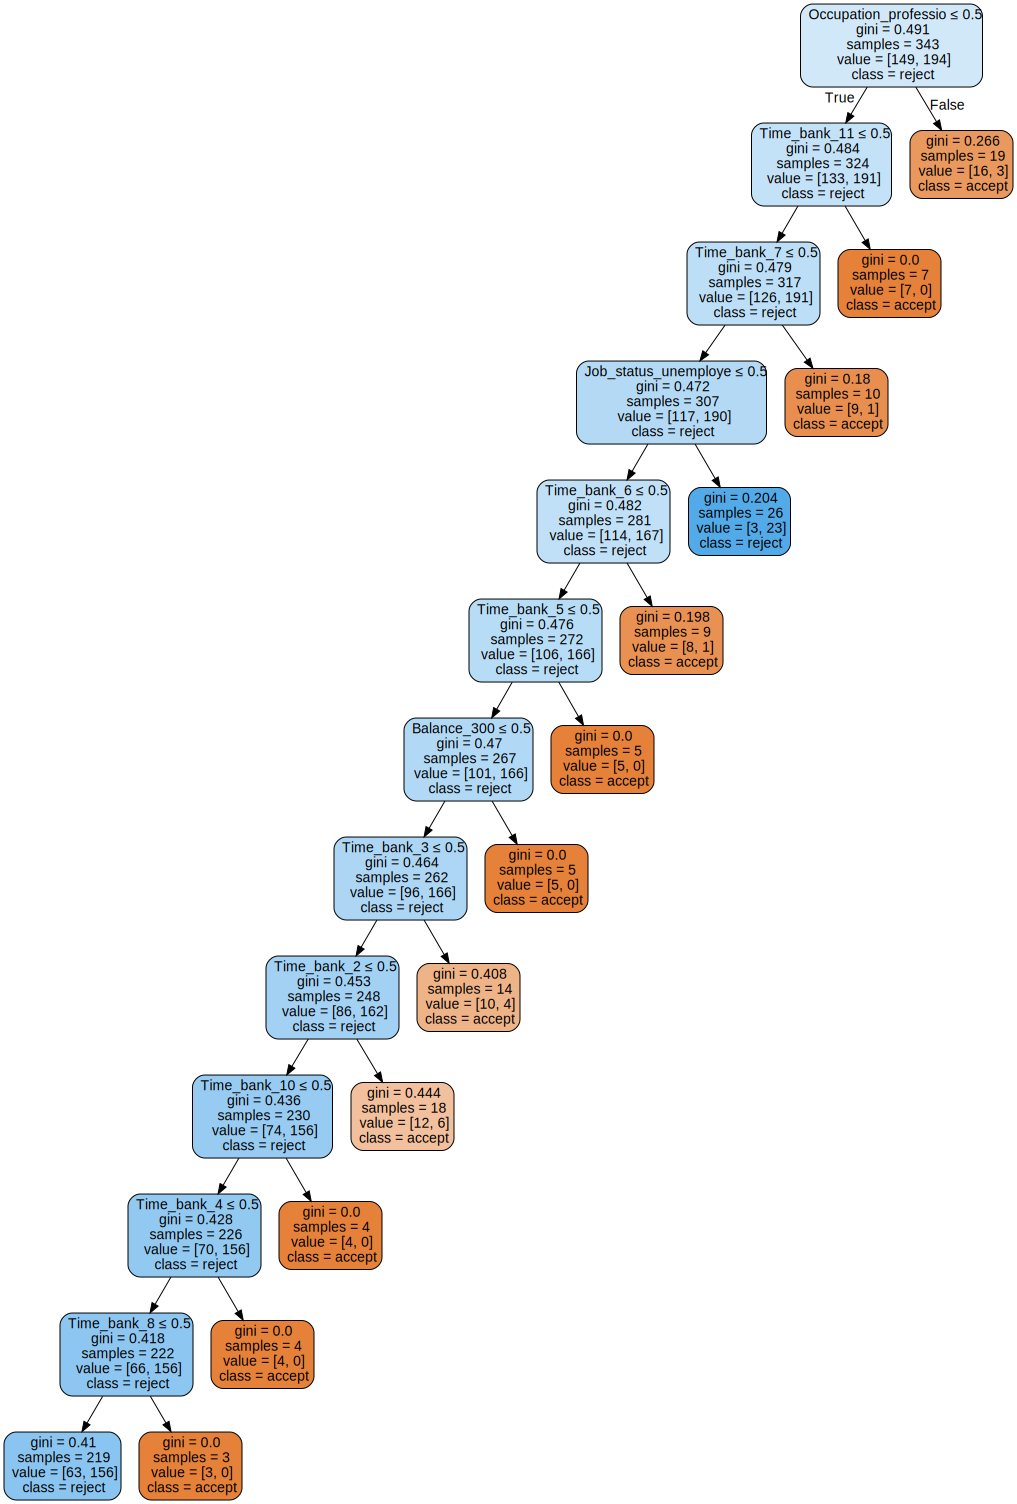

In [44]:
GiniClfData = tree.export_graphviz(loan_gini_clf, out_file=None, 
                      feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                      special_characters=True)  
GiniLoanGraph = graphviz.Source(GiniClfData)  
GiniLoanGraph 

Decision tree with gini criteria depth: 12


[Text(0.5, 1.0, 'Feature importance in the decision tree with gini criterion')]

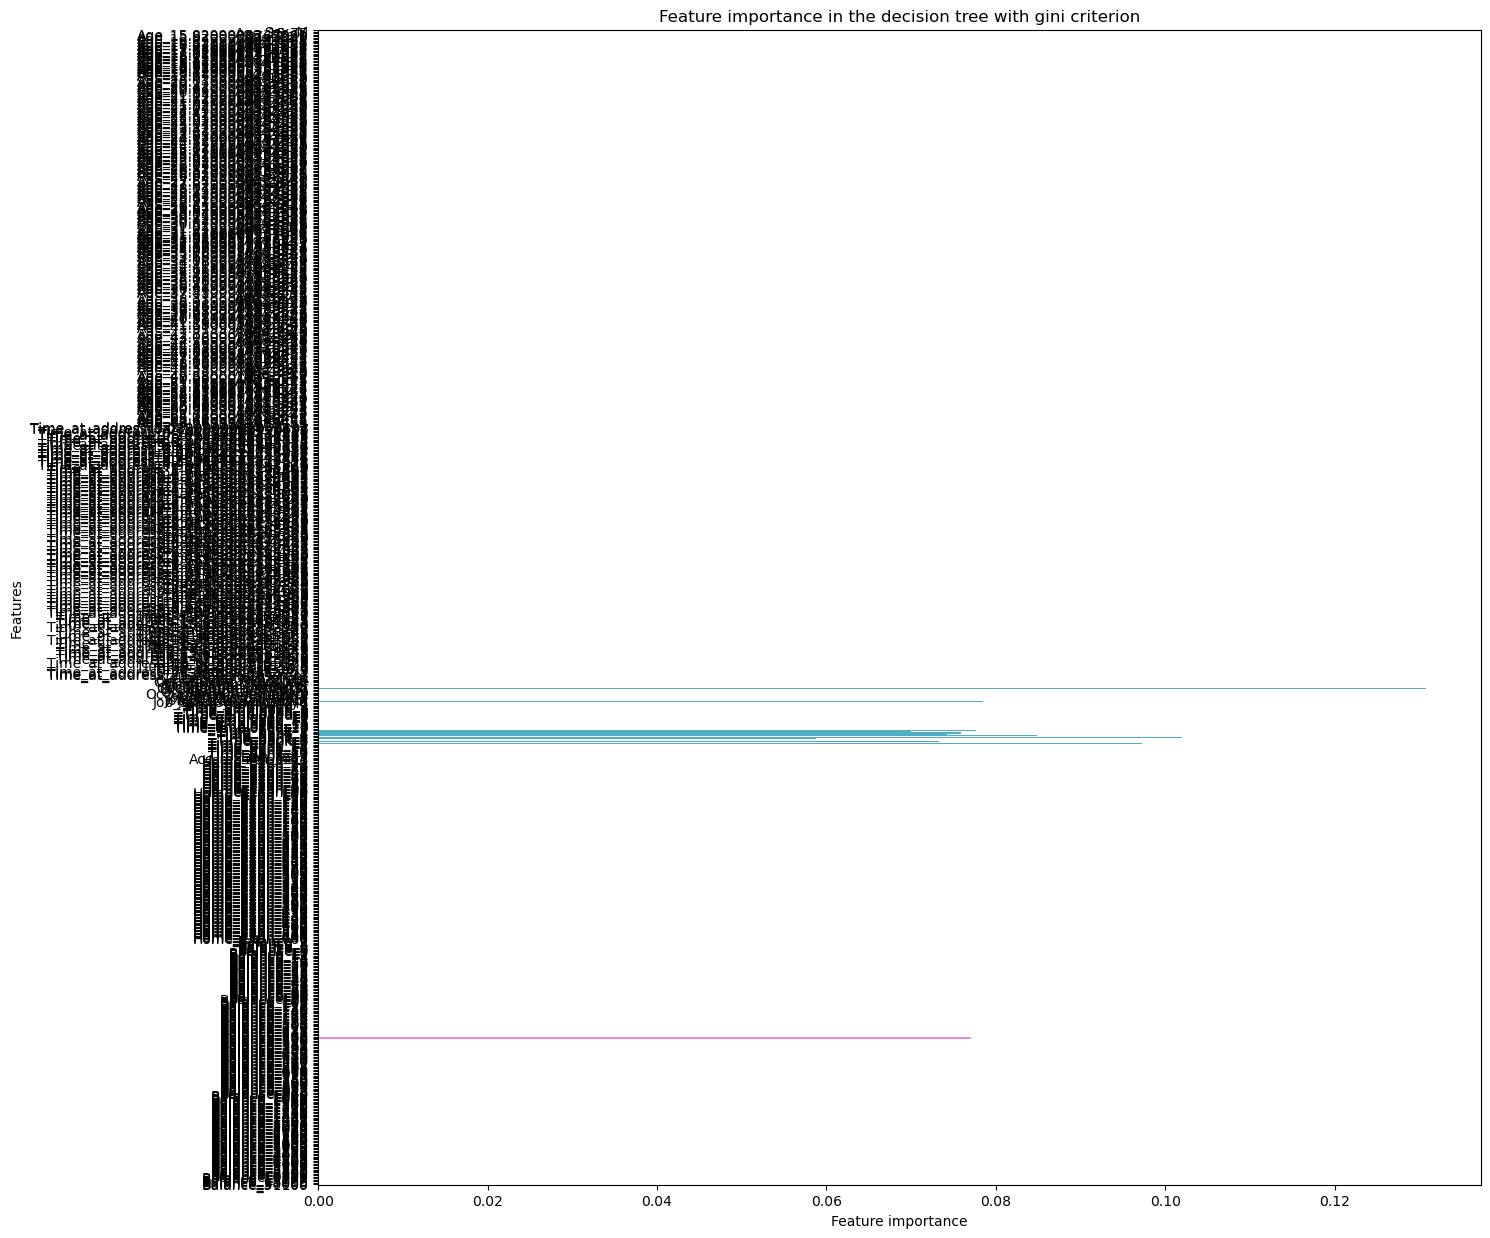

In [45]:
print('Decision tree with gini criteria depth:', loan_gini_clf.tree_.max_depth)

loan_gini_features_dict = {'Feature importance': loan_gini_clf.feature_importances_,
                             'Features': list(X.columns)}
loan_gini_features_df = pd.DataFrame(loan_gini_features_dict)

plt.figure(figsize=(15,15))
sns.barplot(data=loan_gini_features_df, y='Features', x='Feature importance').set(
    title='Feature importance in the decision tree with gini criterion')

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc_entropy = RandomForestClassifier(n_estimators=100, criterion='entropy')

In [48]:
rfc_entropy.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [50]:
rfc_entropy_pred = rfc_entropy.predict(X_test)

In [51]:
print(classification_report(y_test, rfc_entropy_pred))

              precision    recall  f1-score   support

      accept       0.83      0.56      0.67        43
      reject       0.67      0.88      0.76        43

    accuracy                           0.72        86
   macro avg       0.75      0.72      0.71        86
weighted avg       0.75      0.72      0.71        86



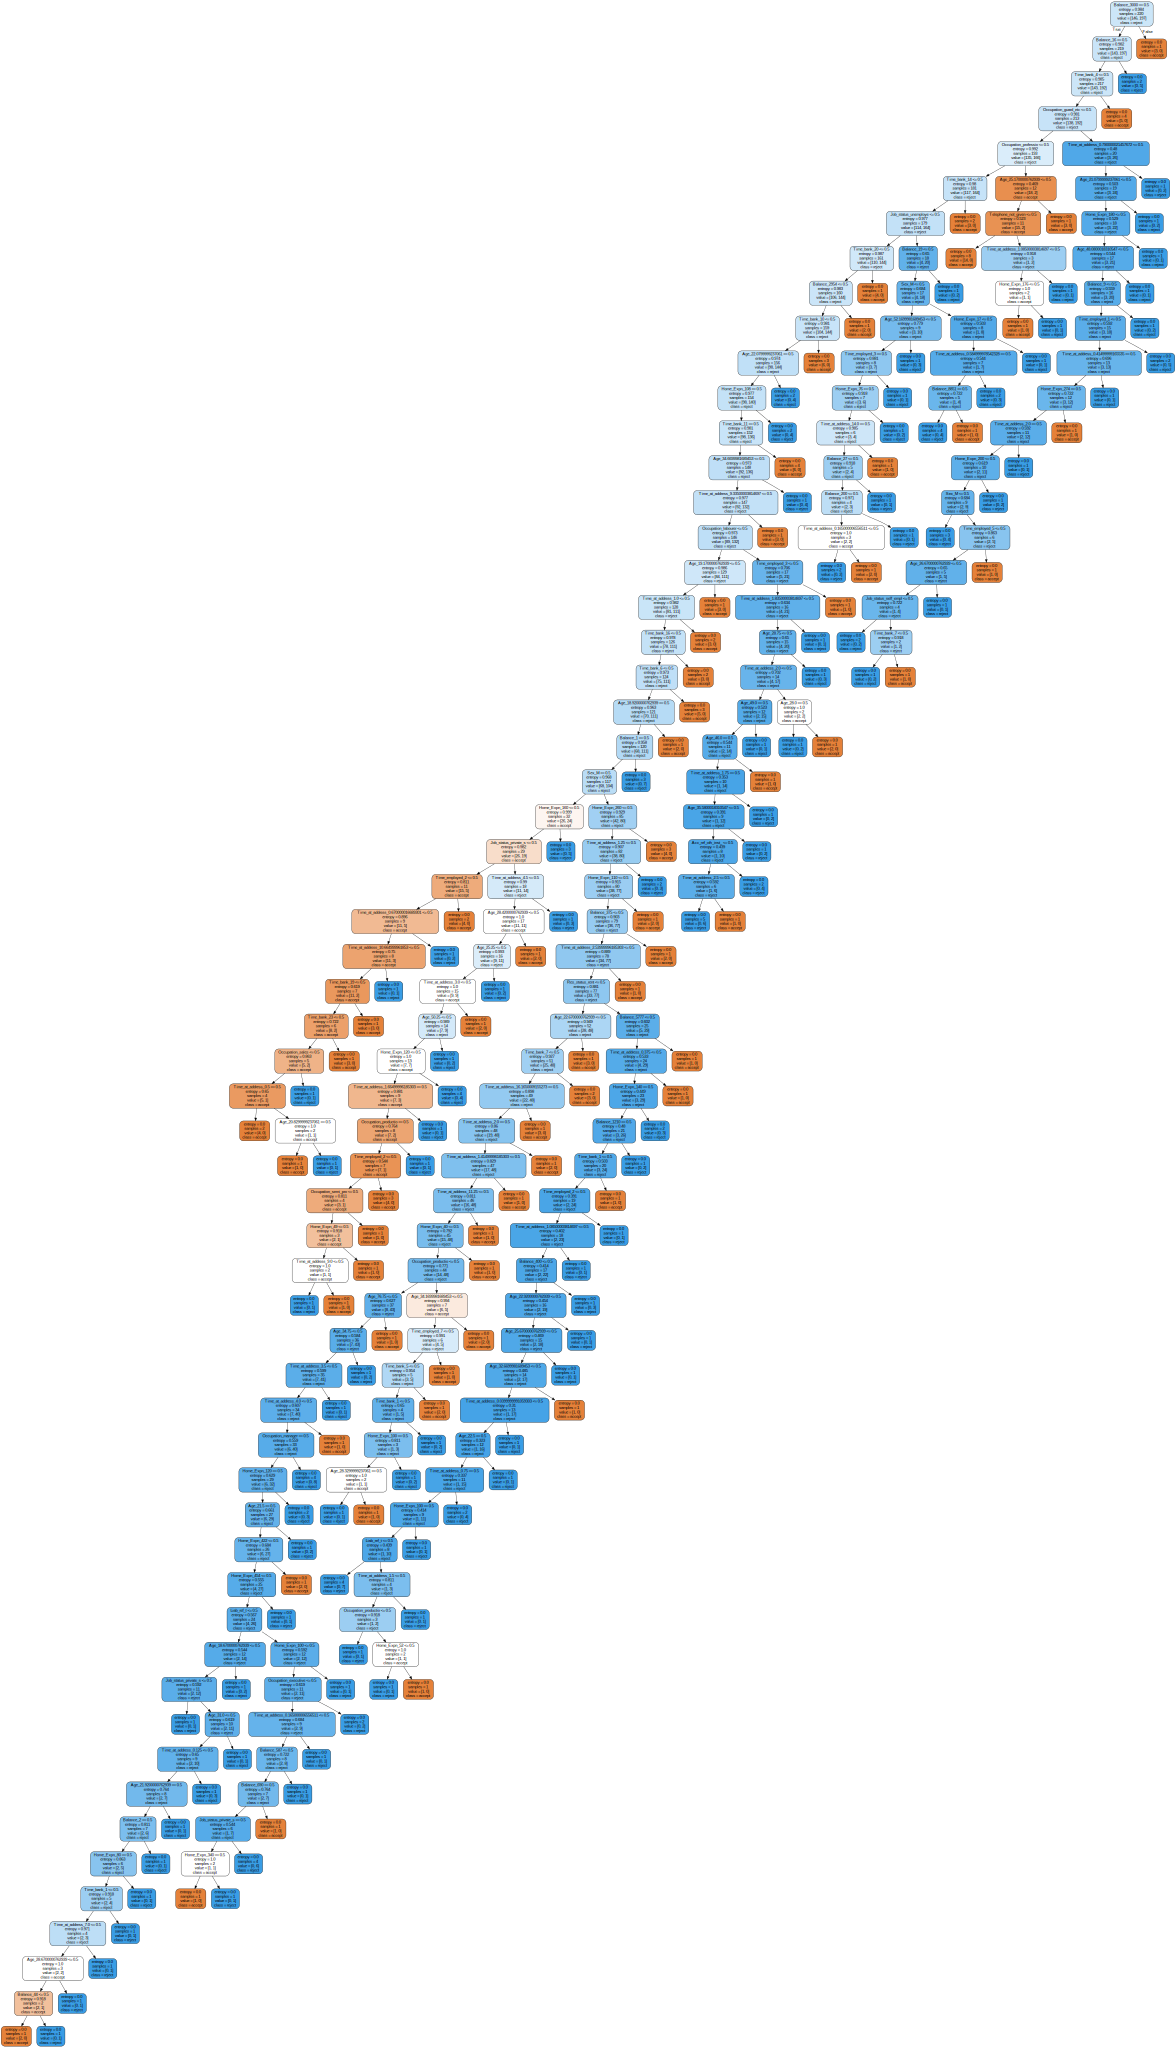

In [52]:
rfc_entropy_data = tree.export_graphviz(rfc_entropy.estimators_[99], out_file=None, 
                                            feature_names=features, class_names=classes, 
                                            filled=True, rounded=True, impurity=True)  
rfc_entropy_graph = graphviz.Source(rfc_entropy_data)  
rfc_entropy_graph 

<AxesSubplot:xlabel='Feature importance', ylabel='Features'>

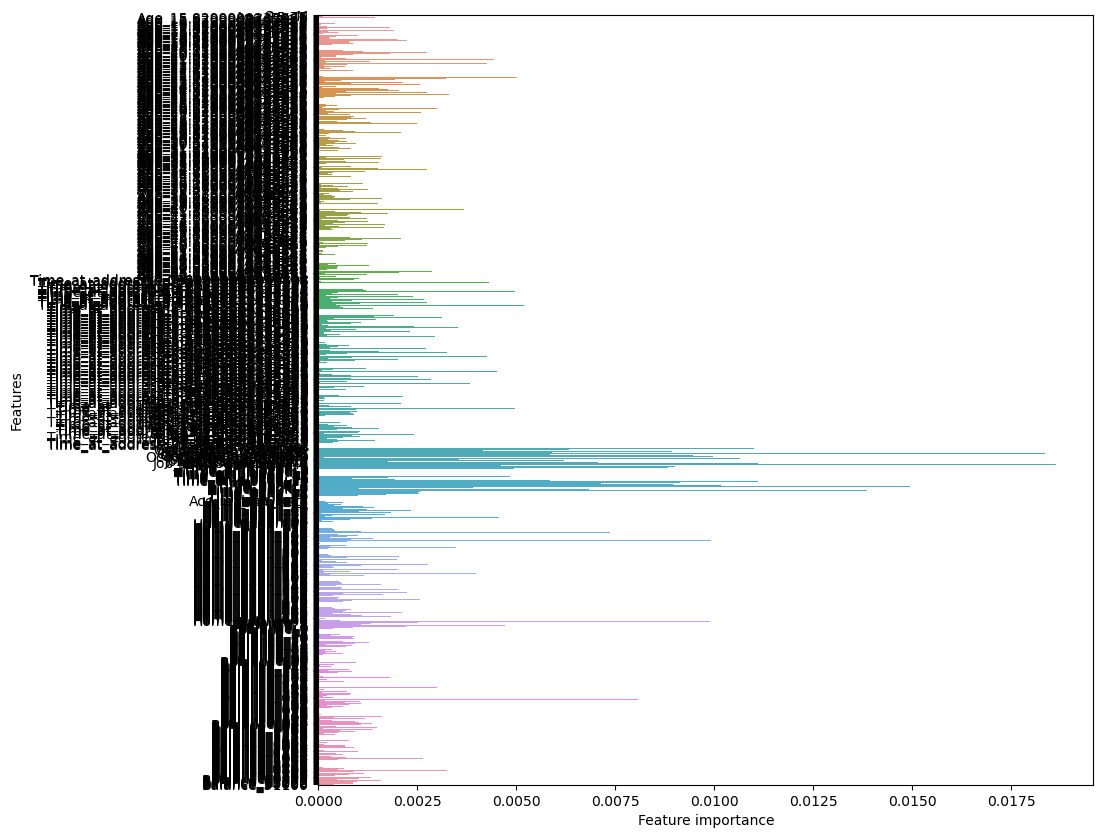

In [53]:
rfc_feat_imp_dict = {
    'Features': list(X.columns),
    'Feature importance': rfc_entropy.feature_importances_
}

plt.figure(figsize=(10,10))
sns.barplot(data=pd.DataFrame(rfc_feat_imp_dict), x='Feature importance', y='Features')

In [56]:
loan_tree_2 = loan_df.drop(['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Balance', 'liab_ref_t'], axis=1)

In [57]:
X_cols = loan_tree_2.drop(['decision_reject'], axis=1)
y_cols = loan_tree_2['decision_reject']

KeyError: "['decision_reject'] not found in axis"